In [5]:
import matplotlib.pyplot as plt

## Compare variant calling

### Ref-wide variant counts

In [15]:
for line in open('GRCh38.chr21.filtered.stats.txt'):
    if line.startswith('SN') and "number of records" in line:
        GRCh38_vars = int(line.strip().split('\t')[3])
for line in open('CHM13v2.chr21.filtered.stats.txt'):
    if line.startswith('SN') and "number of records" in line:
        CHM13v2_vars = int(line.strip().split('\t')[3])

print(f'GRCh38 variants: {GRCh38_vars}')
print(f'CHM13v2 variants: {CHM13v2_vars}')


GRCh38 variants: 99041
CHM13v2 variants: 99568


### Per-sample variant counts

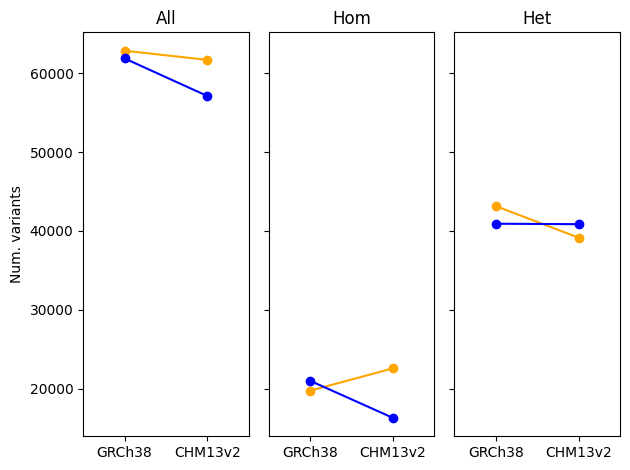

In [48]:
#==============#
# Read in data #
#==============#

HG00116_tot = []
HG00116_hom = []
HG00116_het = []
HG01509_tot = []
HG01509_hom = []
HG01509_het = []

for line in open('GRCh38.chr21.filtered.stats.txt'):
    if line.startswith('PSC'):
        fields = line.strip().split('\t')
        sample = fields[2]
        nAltHom = int(fields[4])
        nHet = int(fields[5])
        if sample == 'HG00116':
            HG00116_tot.append(nAltHom+nHet)
            HG00116_hom.append(nAltHom)
            HG00116_het.append(nHet)
        elif sample == 'HG01509':
            HG01509_tot.append(nAltHom+nHet)
            HG01509_hom.append(nAltHom)
            HG01509_het.append(nHet)
            
for line in open('CHM13v2.chr21.filtered.stats.txt'):
    if line.startswith('PSC'):
        fields = line.strip().split('\t')
        sample = fields[2]
        nAltHom = int(fields[4])
        nHet = int(fields[5])
        if sample == 'HG00116':
            HG00116_tot.append(nAltHom+nHet)
            HG00116_hom.append(nAltHom)
            HG00116_het.append(nHet)
        elif sample == 'HG01509':
            HG01509_tot.append(nAltHom+nHet)
            HG01509_hom.append(nAltHom)
            HG01509_het.append(nHet)

            
#==========#
# Plotting #
#==========#
            
fig, axes = plt.subplots(ncols=3, sharey=True)
axes[0].plot([0,1], HG00116_tot, '-o', c='orange')
axes[0].plot([0,1], HG01509_tot, '-o', c='blue')
axes[0].set_title('All')
axes[1].plot([0,1], HG00116_hom, '-o', c='orange')
axes[1].plot([0,1], HG01509_hom, '-o', c='blue')
axes[1].set_title('Hom')
axes[2].plot([0,1], HG00116_het, '-o', c='orange')
axes[2].plot([0,1], HG01509_het, '-o', c='blue')
axes[2].set_title('Het')

for i in range(3):
    axes[i].set_xlim([-0.5, 1.5])
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['GRCh38', 'CHM13v2']) # order depends on the order you appended results to the lists above

axes[0].set_ylabel('Num. variants')
plt.tight_layout()
plt.show()

## Compare alignment

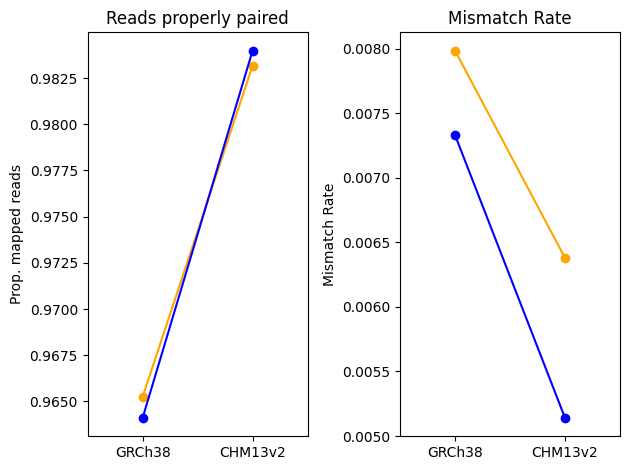

In [54]:
#==============#
# Read in data #
#==============#

HG00116_prop_reads_prop_paired = []
HG00116_mismatch_rate = []
HG01509_prop_reads_prop_paired = []
HG01509_mismatch_rate = []

summary_results = {}
for line in open('HG00116.GRCh38.chr21.cramstats.txt'):
    if line.startswith('SN'):
        fields = line.strip().split('\t')
        category = fields[1].strip(':')
        result = float(fields[2])
        summary_results[category] = result
prop_reads_prop_paired = summary_results['reads properly paired'] / summary_results['reads mapped']
mismatch_rate = summary_results['error rate']
HG00116_prop_reads_prop_paired.append(prop_reads_prop_paired)
HG00116_mismatch_rate.append(mismatch_rate)
    
summary_results = {}
for line in open('HG00116.CHM13v2.chr21.cramstats.txt'):
    if line.startswith('SN'):
        fields = line.strip().split('\t')
        category = fields[1].strip(':')
        result = float(fields[2])
        summary_results[category] = result
prop_reads_prop_paired = summary_results['reads properly paired'] / summary_results['reads mapped']
mismatch_rate = summary_results['error rate']
HG00116_prop_reads_prop_paired.append(prop_reads_prop_paired)
HG00116_mismatch_rate.append(mismatch_rate)
    
summary_results = {}
for line in open('HG01509.GRCh38.chr21.cramstats.txt'):
    if line.startswith('SN'):
        fields = line.strip().split('\t')
        category = fields[1].strip(':')
        result = float(fields[2])
        summary_results[category] = result
prop_reads_prop_paired = summary_results['reads properly paired'] / summary_results['reads mapped']
mismatch_rate = summary_results['error rate']
HG01509_prop_reads_prop_paired.append(prop_reads_prop_paired)
HG01509_mismatch_rate.append(mismatch_rate)
    
summary_results = {}
for line in open('HG01509.CHM13v2.chr21.cramstats.txt'):
    if line.startswith('SN'):
        fields = line.strip().split('\t')
        category = fields[1].strip(':')
        result = float(fields[2])
        summary_results[category] = result
prop_reads_prop_paired = summary_results['reads properly paired'] / summary_results['reads mapped']
mismatch_rate = summary_results['error rate']
HG01509_prop_reads_prop_paired.append(prop_reads_prop_paired)
HG01509_mismatch_rate.append(mismatch_rate)


#==========#
# Plotting #
#==========#

fig, axes = plt.subplots(ncols=2)
axes[0].plot([0,1], HG00116_prop_reads_prop_paired, '-o', c='orange')
axes[0].plot([0,1], HG01509_prop_reads_prop_paired, '-o', c='blue')
axes[0].set_title('Reads properly paired')
axes[0].set_ylabel('Prop. mapped reads')
axes[1].plot([0,1], HG00116_mismatch_rate, '-o', c='orange')
axes[1].plot([0,1], HG01509_mismatch_rate, '-o', c='blue')
axes[1].set_title('Mismatch Rate')
axes[1].set_ylabel('Mismatch Rate')

for i in range(2):
    axes[i].set_xlim([-0.5, 1.5])
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['GRCh38', 'CHM13v2']) # order depends on the order you appended results to the lists above

plt.tight_layout()
plt.show()